# 8. PILOT COMPARISON BY SEASON

In [130]:
import fastf1
import pickle
import os
import copy
import calendar
import numpy as np
import pandas as pd

#Visualization
import tanglegram as tg
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
from scipy.cluster import hierarchy


parent_dir = os.path.dirname(os.path.realpath("8. Pilot Comparison by Season.ipynb")) 
data_path = os.path.join(parent_dir, 'Data Objects')

In [2]:
with open(os.path.join(data_path, 'condensed_dist22.pkl'), 'rb') as f:
    condensed_dist22 = pickle.load(f)

with open(os.path.join(data_path, 'condensed_dist23.pkl'), 'rb') as f:
    condensed_dist23 = pickle.load(f)
    
with open(os.path.join(data_path, 'cos_sim22.pkl'), 'rb') as f:
    cos_sim22 = pickle.load(f)

with open(os.path.join(data_path, 'cos_sim23.pkl'), 'rb') as f:
    cos_sim23 = pickle.load(f)
    
with open(os.path.join(data_path, 'dist_matrix22.pkl'), 'rb') as f:
    dist_matrix22 = pickle.load(f)

with open(os.path.join(data_path, 'dist_matrix23.pkl'), 'rb') as f:
    dist_matrix23 = pickle.load(f)

In [3]:
condensed_dist22 = condensed_dist22.astype(np.float64)
dist_matrix22 = dist_matrix22.astype(np.float64)

print("Data type of condensed_distance_matrix:", condensed_dist22.dtype)
print("Data type of distance_matrix:", dist_matrix22.dtype)

Data type of condensed_distance_matrix: float64
Data type of distance_matrix: float64


In [4]:
condensed_dist23 = condensed_dist23.astype(np.float64)
dist_matrix23 = dist_matrix23.astype(np.float64)

print("Data type of condensed_distance_matrix:", condensed_dist23.dtype)
print("Data type of distance_matrix:", dist_matrix23.dtype)

Data type of condensed_distance_matrix: float64
Data type of distance_matrix: float64


 ### 8.1 Hierarchical Clustering
 #### 8.1.1 Dendrograms

In [5]:
def hierarchical_clustering(cosine, distance, condensed, method, yrange, year):
    linked = sch.linkage(condensed, method) #single, average, complete

    labels = [f'Pilot {i}' for i in cosine.index]

    fig = ff.create_dendrogram(distance, labels=labels, linkagefun=lambda x: linked)
    fig.update_layout(title=f'{year} Hierarchical Clustering of F1 Pilots-{method}',
                      xaxis_title='Pilot',
                      yaxis_title='Distance',autosize=False, width=700, height=500,yaxis=dict(range=yrange))
    
    #fig.update_traces(line=dict(color='red'))
        
    return fig

In [32]:
def find_min_index(matrix):
    min_value = float('inf')
    min_index = None

    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] != 0 and matrix[i][j] < min_value:
                min_value = matrix[i][j]
                min_index = (i, j)

    return min_index

find_min_index(dist_matrix23)

(7, 13)

In [43]:
def find_max_index(matrix):
    max_value = float('-inf')
    max_index = None

    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] != 1 and matrix[i][j] > max_value:
                max_value = matrix[i][j]
                max_index = (i, j)

    return max_index

find_max_index(dist_matrix22)

(7, 18)

In [6]:
hierarchical_clustering(cos_sim22, dist_matrix22, condensed_dist22, 'single', [0.9840,0.9889],2022)

In [ ]:
hierarchical_clustering(cos_sim22, dist_matrix22, condensed_dist22, 'average', [0.982,0.9868],2022)

In [ ]:
hierarchical_clustering(cos_sim22, dist_matrix22, condensed_dist22, 'complete', [0.9840,0.996],2022)

In [ ]:
hierarchical_clustering(cos_sim23, dist_matrix23, condensed_dist23, 'single', [0.9840,1],2023)

In [ ]:
hierarchical_clustering(cos_sim23, dist_matrix23, condensed_dist23, 'average',[0.9840,0.986], 2023)

In [ ]:
hierarchical_clustering(cos_sim23, dist_matrix23, condensed_dist23, 'complete', [0.9840,0.999],2023)

#### 8.1.2 Tanglegram for Comparison

C:\Users\sinem\AppData\Local\Temp\ipykernel_16872\3987605028.py:1: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

C:\Users\sinem\AppData\Local\Temp\ipykernel_16872\3987605028.py:2: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



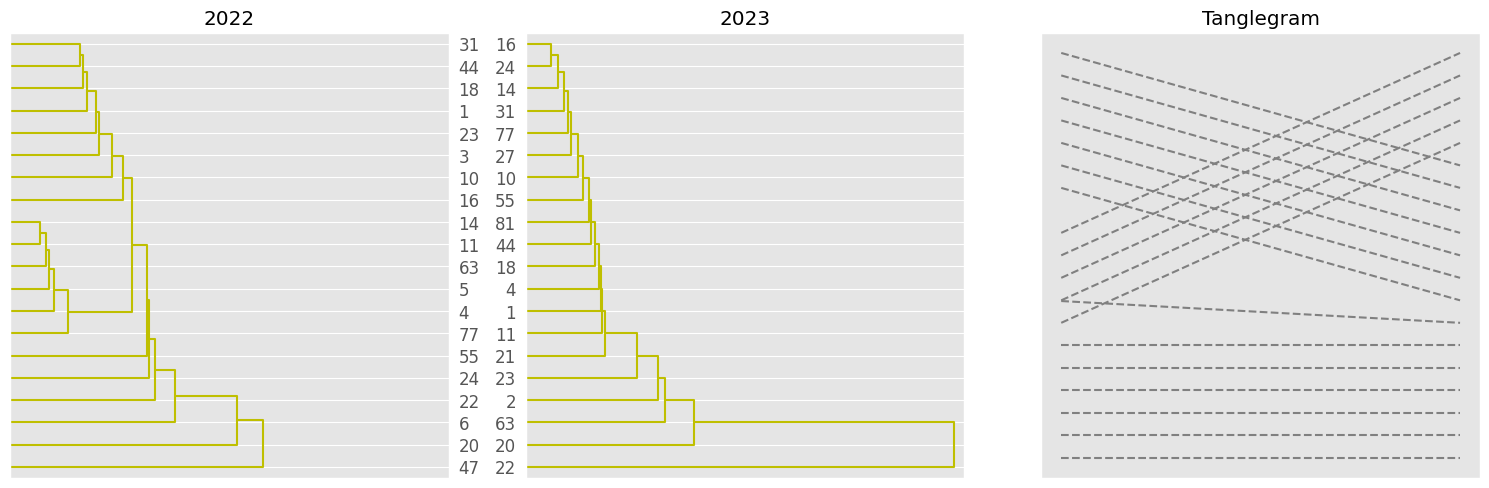

In [138]:
linkage1 = hierarchy.linkage(dist_matrix22, method='average')
linkage2 = hierarchy.linkage(dist_matrix23, method='average')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

dendrogram1 = hierarchy.dendrogram(linkage1, ax=ax1, above_threshold_color='y', orientation='left', labels=cos_sim22.index)
ax1.set_title('2022')
ax1.set_xticks([])
ax1.set_xlim([1.38,1.42])

dendrogram2 = hierarchy.dendrogram(linkage2, ax=ax2, above_threshold_color='y', orientation='right', labels=cos_sim23.index)
ax2.set_title('2023')
ax2.set_xticks([])
ax2.set_xlim([1.39,1.425])

for i in range(len(linkage1)):
    xs = [0, 1]
    ys = [dendrogram1['icoord'][i][1], dendrogram2['icoord'][i][1]]
    ax3.plot(xs, ys, color='gray', linestyle='--')

ax3.set_title('Tanglegram')
ax3.set_xticks([]) 
ax3.set_yticks([]) 

plt.tight_layout()
plt.show()

INFO  : Generating linkage from distances (tanglegram.tangle)
INFO  : Generating linkage from distances (tanglegram.tangle)
INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


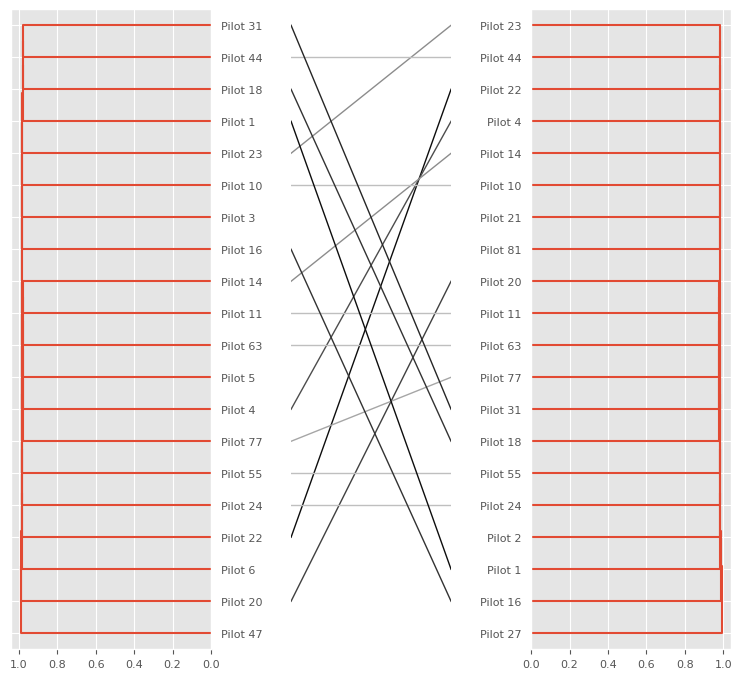

In [137]:
l1=[f'Pilot {i}' for i in cos_sim22.index]
l2=[f'Pilot {i}' for i in cos_sim23.index]

mat1 = pd.DataFrame(dist_matrix22,
                    columns=l1,
                    index=l1)

mat2 = pd.DataFrame(dist_matrix22,
                    columns=l2,
                    index=l2)

# Plot tanglegram
fig = tg.plot(mat1, mat2, sort=False)